In [4]:
import arviz as az
from arviz.utils import Numba
import pickle
from collections import defaultdict
from pathlib import Path
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import numpy as np
Numba.disable_numba()
Numba.numba_flag

False

In [5]:
test_trace = az.from_netcdf("/mnt/home/xiziyi/MCMC/iter1/mcmc_result/trace_22.nc")
test_azdf=az.summary(test_trace, round_to=2,var_names=["R"])
print(len(test_azdf))
test_azdf

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


1119


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
R[0],1.00,0.00,0.99,1.00,0.0,0.0,1241.96,378.86,NaN
R[1],0.96,0.04,0.89,1.00,0.0,0.0,1513.05,522.54,NaN
R[2],1.00,0.00,0.99,1.00,0.0,0.0,972.23,333.79,NaN
R[3],1.00,0.00,0.99,1.00,0.0,0.0,1429.92,477.18,NaN
R[4],1.00,0.00,0.99,1.00,0.0,0.0,1825.21,660.72,NaN
...,...,...,...,...,...,...,...,...,...
R[1114],0.99,0.01,0.99,1.00,0.0,0.0,1545.58,637.72,NaN
R[1115],0.99,0.01,0.97,1.00,0.0,0.0,1504.78,574.89,NaN
R[1116],1.00,0.00,0.99,1.00,0.0,0.0,1422.94,550.13,NaN
R[1117],0.97,0.03,0.91,1.00,0.0,0.0,1502.50,466.55,NaN


In [6]:
with open("/mnt/home/xiziyi/MCMC/iter1/mcmc_result/idx2trueidx_0.pkl", "rb") as f:
    test_mapping = pickle.load(f)
test_mapping, len(test_mapping)

({0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 5,
  5: 6,
  6: 7,
  7: 8,
  8: 9,
  9: 10,
  10: 11,
  11: 12,
  12: 13,
  13: 16,
  14: 17,
  15: 19,
  16: 20,
  17: 21,
  18: 24,
  19: 25,
  20: 26,
  21: 27,
  22: 28,
  23: 29,
  24: 31,
  25: 32,
  26: 33,
  27: 34,
  28: 40,
  29: 41,
  30: 42,
  31: 43,
  32: 44,
  33: 45,
  34: 46,
  35: 48,
  36: 49,
  37: 50,
  38: 51,
  39: 52,
  40: 53,
  41: 54,
  42: 55,
  43: 56,
  44: 57,
  45: 61,
  46: 63,
  47: 64,
  48: 65,
  49: 67,
  50: 69,
  51: 70,
  52: 71,
  53: 72,
  54: 76,
  55: 77,
  56: 78,
  57: 79,
  58: 80,
  59: 81,
  60: 82,
  61: 83,
  62: 84,
  63: 86,
  64: 89,
  65: 91,
  66: 93,
  67: 94,
  68: 101,
  69: 103,
  70: 104,
  71: 107,
  72: 108,
  73: 111,
  74: 113,
  75: 114,
  76: 115,
  77: 116,
  78: 118,
  79: 120,
  80: 122,
  81: 123,
  82: 125,
  83: 127,
  84: 129,
  85: 134,
  86: 135,
  87: 136,
  88: 141,
  89: 143,
  90: 144,
  91: 148,
  92: 149,
  93: 151,
  94: 152,
  95: 153,
  96: 155,
  97: 156,
  98: 157

In [7]:
def get_id2mean(total_traces: int, mcmc_result_dir: Path):
    id2mean_mapper = defaultdict(list)
    for itrace in tqdm(range(total_traces), desc="get id2mean"):
        trace = az.from_netcdf(mcmc_result_dir / f"trace_{itrace}.nc")
        azdf = az.summary(trace, round_to=2, var_names=["R"])
        with open(mcmc_result_dir / f"idx2trueidx_{itrace}.pkl", "rb") as f:
            mapping = pickle.load(f)
        for idx, row in azdf.iterrows():
            index = int(idx[2:-1])
            id2mean_mapper[mapping[index]].append(row["mean"])

    id2mean = {}
    for key, value in id2mean_mapper.items():
        id2mean[key] = sum(value) / len(value)
    return id2mean
id2mean = get_id2mean(40, Path("/mnt/home/xiziyi/MCMC/iter1/mcmc_result_delta"))

get id2mean:   0%|          | 0/40 [00:00<?, ?it/s]

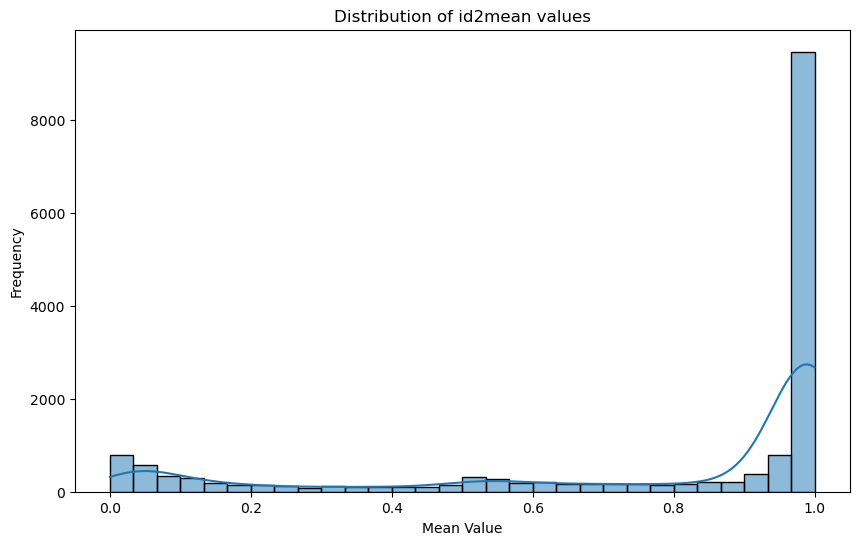

In [8]:
# plot histogram to show distribution of id2mean values
plt.figure(figsize=(10, 6))
sns.histplot(list(id2mean.values()), bins=30, kde=True)
plt.title("Distribution of id2mean values")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")
plt.show()

In [9]:
pref_filter_df = pd.read_csv("/mnt/home/xiziyi/MCMC/notebook/result/filtered_iteration1.csv")
pref_filter_df.head()

,EVENT_ID,ORIGIN_TIME,STATION,NETWORK,ELON,ELAT,EDEP,PTIME,PSTIME,SLON,SLAT
0,70083,2009-11-22 18:30:43.175,A01,YL,-176.9616,-21.3738,432.13,2009-11-22 18:31:36.417000,2009-11-22 18:31:44.827000,-175.623505,-21.533899
1,47726,2009-11-25 16:42:20.932,A01,YL,-177.1675,-20.3089,538.81,2009-11-25 16:43:27.117000,2009-11-25 16:43:36.817000,-175.623505,-21.533899
2,81205,2009-11-25 19:27:46.879,A01,YL,-177.2498,-18.7738,588.46,2009-11-25 19:29:03.947000,2009-11-25 19:29:16.947000,-175.623505,-21.533899
3,19375,2009-11-30 00:47:37.682,A01,YL,-178.5479,-22.8522,608.55,2009-11-30 00:48:54.582000,2009-11-30 00:49:05.462000,-175.623505,-21.533899
4,12430,2009-11-30 01:13:19.314,A01,YL,-176.1479,-21.6944,185.84,2009-11-30 01:13:44.092000,2009-11-30 01:13:56.242000,-175.623505,-21.533899


In [10]:
# only filter the rows with value in id2mean larger or equal to 0.5
id2mean_used = {key: value for key, value in id2mean.items() if value >= 0.5}
post_filter_df = pref_filter_df[pref_filter_df.index.isin(id2mean_used.keys())]
print(len(pref_filter_df), len(post_filter_df))
post_filter_df.head()

20860 12994


,EVENT_ID,ORIGIN_TIME,STATION,NETWORK,ELON,ELAT,EDEP,PTIME,PSTIME,SLON,SLAT
0,70083,2009-11-22 18:30:43.175,A01,YL,-176.9616,-21.3738,432.13,2009-11-22 18:31:36.417000,2009-11-22 18:31:44.827000,-175.623505,-21.533899
1,47726,2009-11-25 16:42:20.932,A01,YL,-177.1675,-20.3089,538.81,2009-11-25 16:43:27.117000,2009-11-25 16:43:36.817000,-175.623505,-21.533899
4,12430,2009-11-30 01:13:19.314,A01,YL,-176.1479,-21.6944,185.84,2009-11-30 01:13:44.092000,2009-11-30 01:13:56.242000,-175.623505,-21.533899
5,18851,2009-11-30 13:30:37.186,A01,YL,-177.7229,-19.8930,568.17,2009-11-30 13:31:48.862000,2009-11-30 13:31:59.232000,-175.623505,-21.533899
8,30639,2009-12-01 08:07:03.179,A01,YL,-178.4213,-17.6565,566.06,2009-12-01 08:08:29.132000,2009-12-01 08:08:39.362000,-175.623505,-21.533899


In [15]:
catalog = pd.read_csv("/mnt/home/xiziyi/MCMC/notebook/result/TongaML_final_catalog_picks.csv")
catalog.head()
sta2network = {}
for idx, row in catalog.iterrows():
    sta2network[row["STATION"]] = row["NETWORK"]
len(sta2network)

68

In [16]:
h5mapper = {}
for idx, row in post_filter_df.iterrows():
    # time difference between PSTIME and PTIME
    h5mapper[(str(row["EVENT_ID"]), row["STATION"])] = int((pd.to_datetime(row["PSTIME"]) - pd.to_datetime(row["PTIME"])).total_seconds()*40)

In [11]:
count= 0
pbar = tqdm(total=len(pd.read_csv("/mnt/home/xiziyi/MCMC/notebook/result/TongaML_final_catalog_picks.csv")), desc="update h5 p")
psbar = tqdm(total=len(h5mapper), desc="update h5 ps")
pdel = tqdm(desc="delete h5 file")
with h5py.File("/mnt/home/xiziyi/MCMC/notebook/data_scratch/concurrency_files/iteration2_training.h5", "w") as f:
    with h5py.File("/mnt/home/xiziyi/MCMC/notebook/data_scratch/concurrency_files/TongaML_final.h5", "r") as ref:
        for event_id in ref.keys():
            f.create_group(event_id)
            for station in ref[event_id].keys():
                f[event_id].create_dataset(station, data=ref[event_id][station][:], compression="gzip", compression_opts=9)
                pbar.update(1)
                for key,attr in ref[event_id][station].attrs.items():
                    f[event_id][station].attrs[key] = attr
                if (event_id, station) in h5mapper:
                    psbar.update(1)
                    if "P" in f[event_id][station].attrs["phase_type"]:
                        f[event_id][station].attrs["phase_type"] = np.append(f[event_id][station].attrs["phase_type"], "PS")
                        f[event_id][station].attrs["phase_index"] = np.append(f[event_id][station].attrs["phase_index"], f[event_id][station].attrs["phase_index"][0] + h5mapper[(event_id, station)])
                        count += 1
                if min(f[event_id][station].attrs["phase_index"]) < 9600:
                    del f[event_id][station]
                    pdel.update(1)
pbar.close()
psbar.close()
pdel.close()
print(count)

update h5 file:   0%|          | 0/338812 [00:00<?, ?it/s]

update h5 file:   0%|          | 0/12719 [00:00<?, ?it/s]

12719


In [10]:
phase_picks_data = []
total = len(pd.read_csv("/mnt/home/xiziyi/MCMC/notebook/result/TongaML_final_catalog_picks.csv")) + len(h5mapper)
print(total)
pbar = tqdm(total=total, desc="update dataframe")
with h5py.File("/mnt/home/xiziyi/MCMC/notebook/data_scratch/concurrency_files/iteration2_training.h5", "r") as f:
    for event_id in f.keys():
        for station in f[event_id].keys():
            for pt, pi in zip(f[event_id][station].attrs["phase_type"], f[event_id][station].attrs["phase_index"]):
                # phase_picks = phase_picks.append({"event_id": event_id, "station_id": station, "phase_index": pi, "phase_type": pt}, ignore_index=True)
                phase_picks_data.append({"event_id": event_id, "station_id": station, "phase_index": pi, "phase_type": pt})
                pbar.update(1)
phase_picks = pd.DataFrame(phase_picks_data)
pbar.close()

351531


update dataframe:   0%|          | 0/351531 [00:00<?, ?it/s]

In [11]:
phase_picks.to_csv("/mnt/home/xiziyi/MCMC/notebook/result/iteration2_phase_picks.csv", index=False)